In [63]:
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def f(x):
  return np.cos(40 * np.pi * x)

In [65]:
a = 3
b = 8
n = 999

dx = (b - a) / n

pepa = np.array([f(a + i * dx) for i in range(n)])

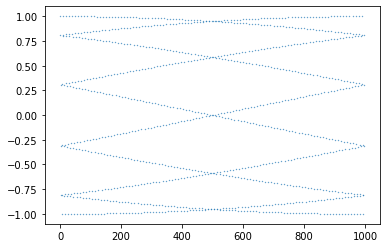

In [66]:
plt.scatter(range(n), pepa, s = 0.1)

In [67]:
def ft_slow(_a):
  _n = len(_a)
  matr = np.array([[np.exp(1j * 2 * np.pi * k * i / (_n+1)) for k in range(_n)] for i in range(_n)])
  return matr.dot(_a)

In [68]:
def fft(_a):
  _a = np.cast[complex](_a)
  _n = len(_a) # количество точек
  if _n <= 1:
    return _a
  if _n <= 32:
    return ft_slow(_a)

  a0 = ft_slow(_a[:-1:2]) #четные
  a1 = ft_slow(_a[1::2])  #не четные

  tmp = 2j * np.pi / (_n+1)
  k = _n - int(_n / 2)
  for i in range(int(_n / 2)):
    _a[i]      = a0[i] + np.exp(tmp * i) * a1[i]
    _a[i + k]  = a0[i] + np.exp(tmp * (i + k)) * a1[i]
  
  
  return _a

slow  0:00:01.770852


(0.0, 0.1)

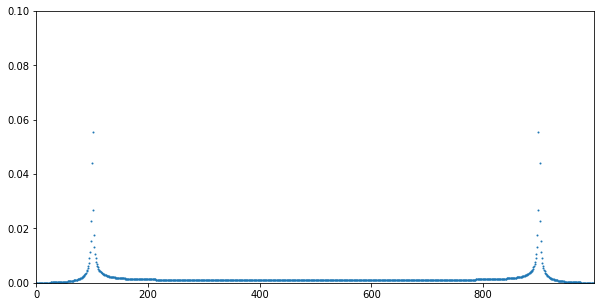

In [69]:
t1 = dt.now()
slow_pepa = 1 / (n + 1) * ft_slow(pepa)
t2 = dt.now()
print("slow ", t2 - t1)


plt.figure(figsize=[10, 5])
plt.scatter(range(n), np.abs(slow_pepa), s = 1)
plt.xlim(0, n)
plt.ylim(0, 0.1)

fft  0:00:00.906330


(0.0, 0.1)

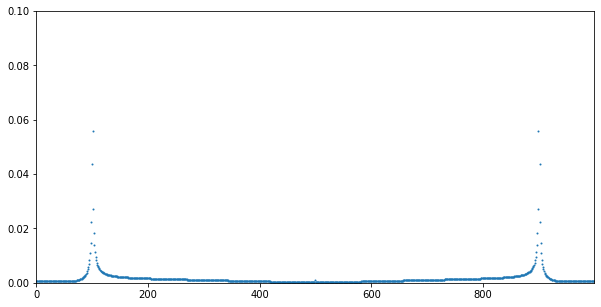

In [70]:
t1 = dt.now()
fft_pepa = 1 / (n + 1) * fft(pepa)
t2 = dt.now()
print("fft ", t2 - t1)

plt.figure(figsize=[10, 5])
plt.scatter(range(n), np.abs(fft_pepa), s = 1)
plt.xlim(0, n)
plt.ylim(0, 0.1)